In [1]:
import kernel_clustering as kc
from aeon.datasets import load_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import rand_score
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

In [2]:
X, y = load_classification("Chinatown")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
X_train = X_train.reshape(X_train.shape[0], -1)
y_train = y_train.reshape(y_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

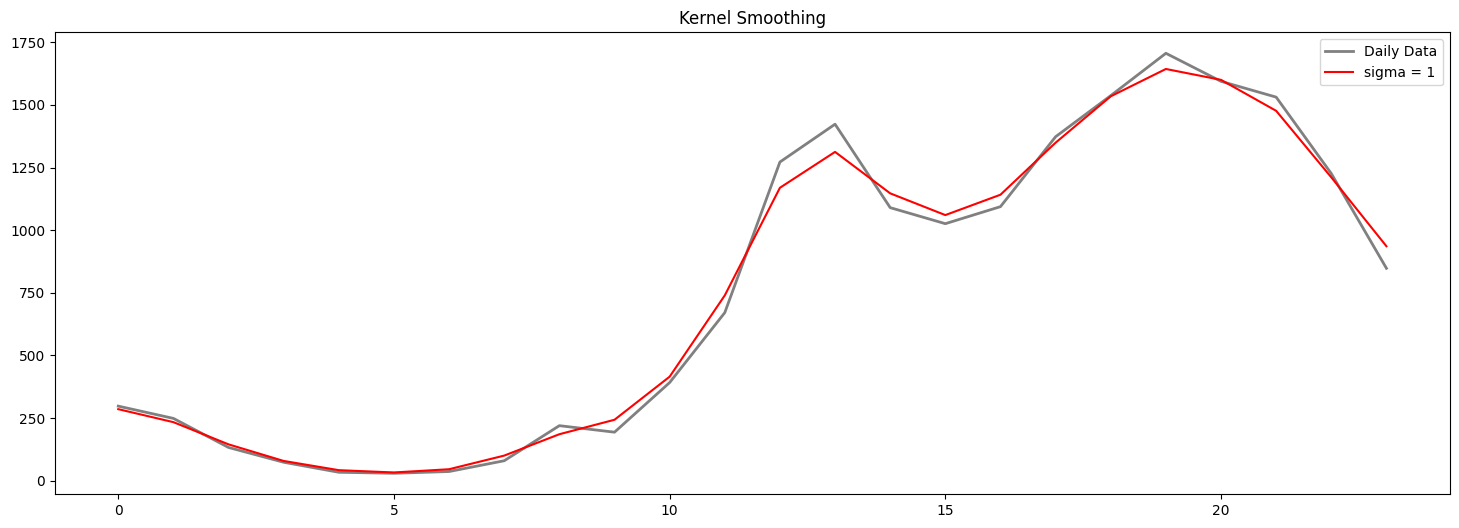

In [4]:
fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(
    X_train[0],
    linestyle="-",
    linewidth=2,
    label="Daily Data",
    color="grey",
)

ax.plot(
    gaussian_filter1d(X_train[0], 0.7),
    color="red",
    markersize=1,
    linestyle="-",
    label="sigma = 1",
)


ax.set_title("Kernel Smoothing")
ax.legend()

In [5]:
optimal_lambda, loss = kc.optimize_lambda(X_train, 2, [(0.1, 3)], 1)

In [6]:
optimal_lambda

3.0

In [17]:
loss, clustering, centers = kc.kernel_clustering(X_train, 3.4, 2)

In [18]:
rand_score(clustering, y_train.reshape(-1))

0.6086147237799785